<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [1]:
#Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
# Import all necessary libraries.
import sys
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import copy

# NomeroffNet path
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

In [3]:
from NomeroffNet.YoloV5Detector import Detector

detector = Detector()
detector.load()

/usr/local/lib64/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [4]:
from NomeroffNet.BBoxNpPoints import NpPointsCraft, getCvZoneRGB, convertCvZonesRGBtoBGR, reshapePoints

npPointsCraft = NpPointsCraft()
npPointsCraft.load()

Loading weights from checkpoint (/mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./models/NpPointsCraft/craft_mlt/craft_mlt_25k_2020-02-16.pth)
Loading weights of refiner from checkpoint (/mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./models/NpPointsCraft/craft_refiner/craft_refiner_CTW1500_2020-02-16.pth)


In [5]:
from NomeroffNet.OptionsDetector import OptionsDetector
from NomeroffNet.TextDetector import TextDetector

optionsDetector = OptionsDetector()
optionsDetector.load("latest")

# Initialize text detector.
textDetector = TextDetector({
    "eu_ua_2004_2015": {
        "for_regions": ["eu_ua_2015", "eu_ua_2004"],
        "model_path": "latest"
    },
    "eu_ua_1995": {
        "for_regions": ["eu_ua_1995"],
        "model_path": "latest"
    },
    "eu": {
        "for_regions": ["eu"],
        "model_path": "latest"
    },
    "ru": {
        "for_regions": ["ru", "eu-ua-fake-lnr", "eu-ua-fake-dnr"],
        "model_path": "latest" 
    },
    "kz": {
        "for_regions": ["kz"],
        "model_path": "latest"
    },
    "ge": {
        "for_regions": ["ge"],
        "model_path": "latest"
    },
    "su": {
        "for_regions": ["su"],
        "model_path": "latest"
    }
})

In [6]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

[[[348.9459946633956, 712.6227386991018], [348.94599466339554, 654.5404122072654], [589.0540053366044, 662.3700229550487], [589.0540183514759, 720.4523527874401]], [[162, 405], [162, 385], [211, 385], [211, 405]]]


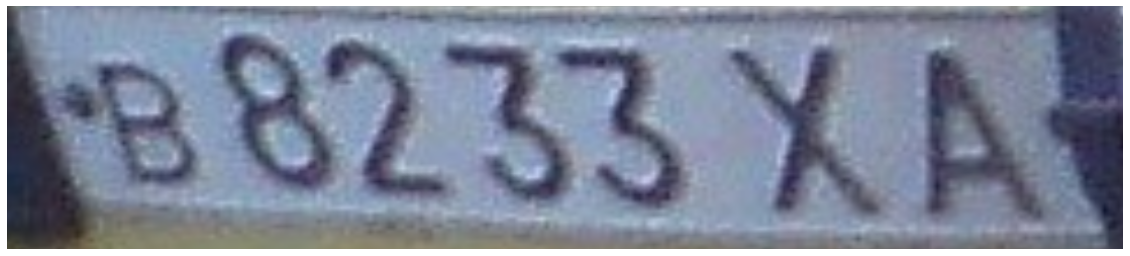

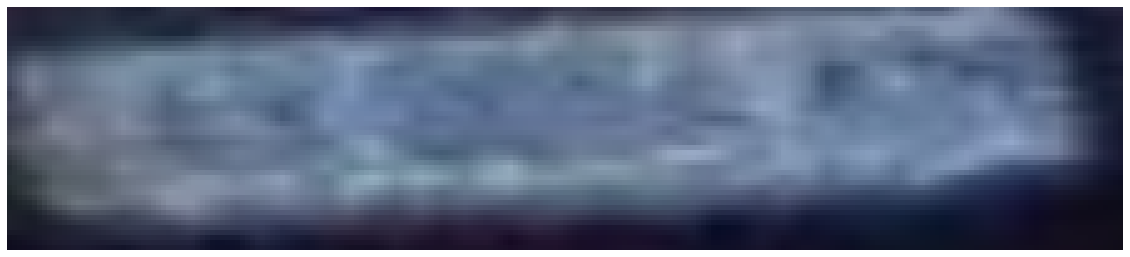

/mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))
/mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/nnmodels/numberplate_options_model.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(self.fc3_line(x2))


['su', 'am']
[1, 2]
['В8233ХА', '']


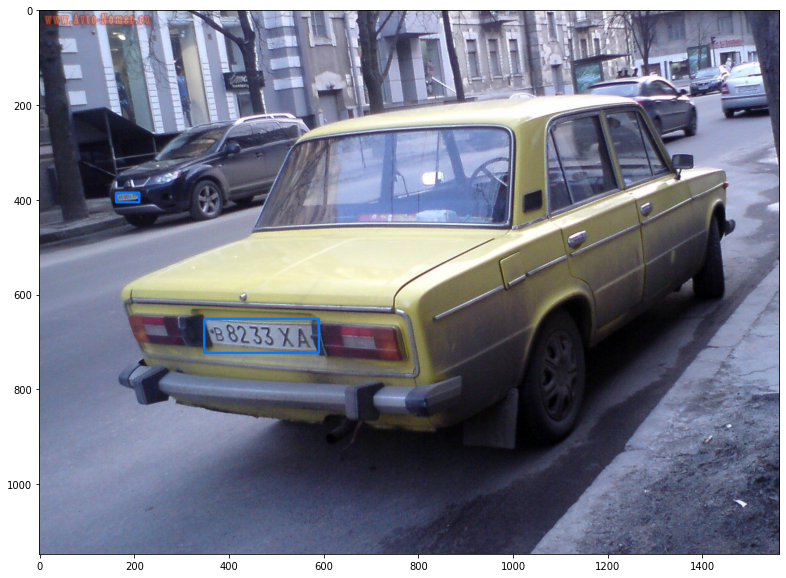

[[[642.0, 496.19999992370606], [642.0, 463.133333568573], [799.0, 463.133333568573], [799.0, 496.19999992370606]], [[972, 271], [972, 248], [1000, 248], [1000, 271]]]


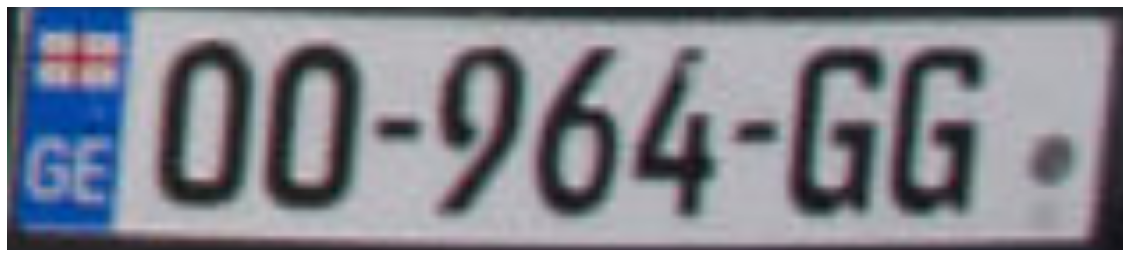

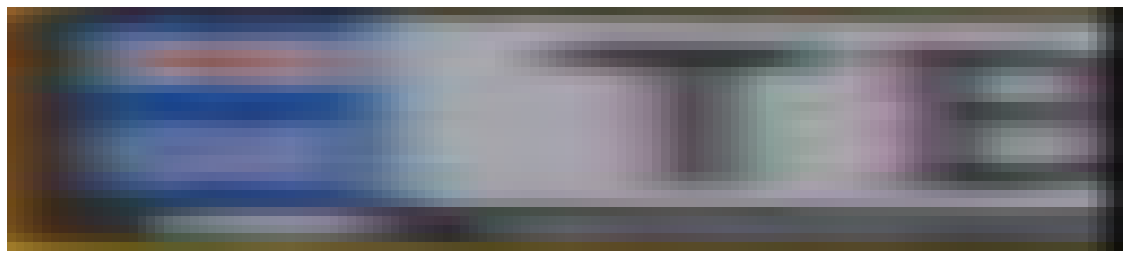

['ge', 'eu_ua_2015']
[1, 1]
['00964GG', 'C77IE']


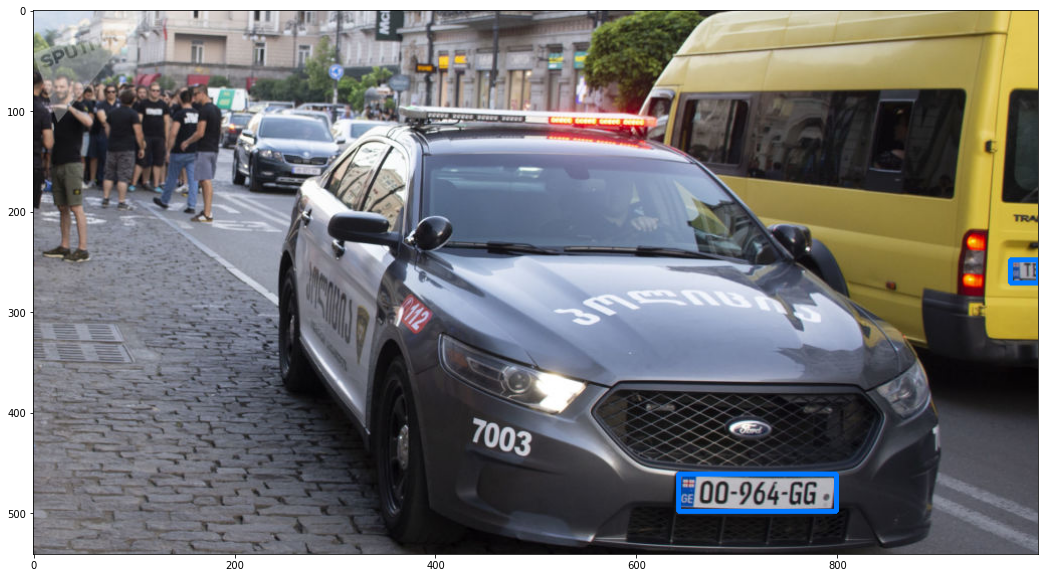

[[[847.56, 405.4], [847.56, 380.6], [946.0, 380.6], [946.0, 405.4]], [[431.8399979782104, 404.0666667556763], [431.8399991607666, 379.2666622638702], [526.0, 379.26665818214417], [526.0, 404.0666626739502]]]


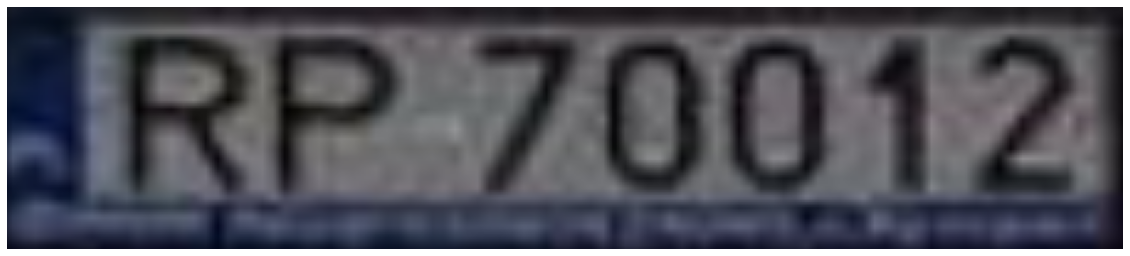

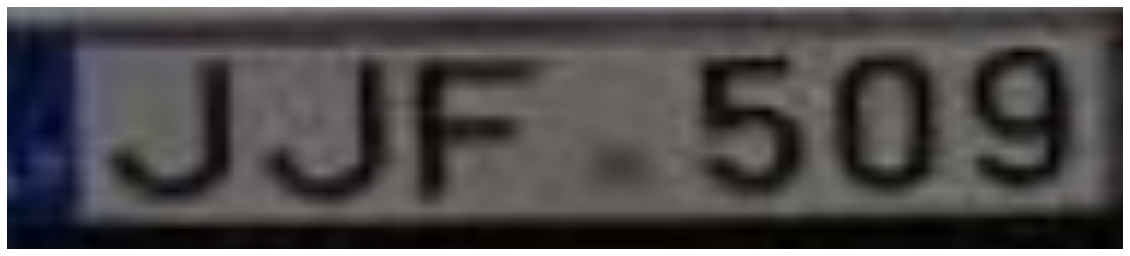

['eu', 'eu']
[1, 1]
['JRJPJ7F7', '0501029']


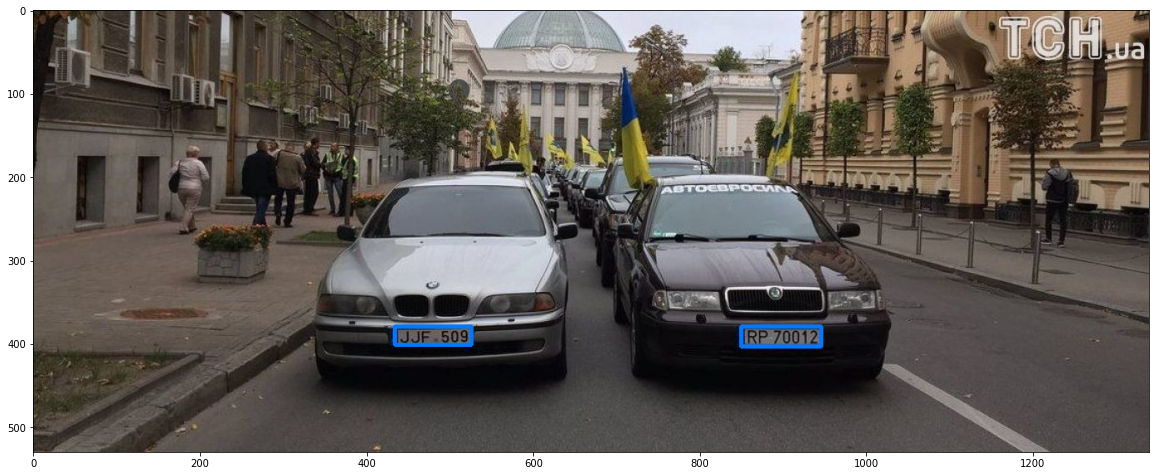

[[[166.69639922518434, 447.29748998823504], [166.6963992251843, 387.1406607074289], [303.9551162546544, 456.7943477686019], [303.9551161969272, 516.951173958819]]]


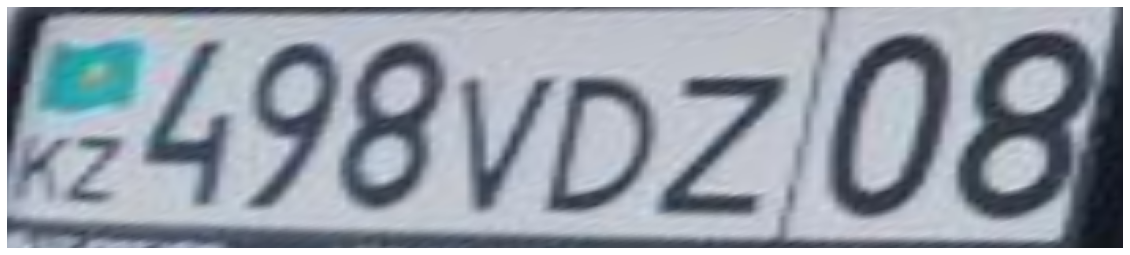

['kz']
[1]
['498VDZ08']


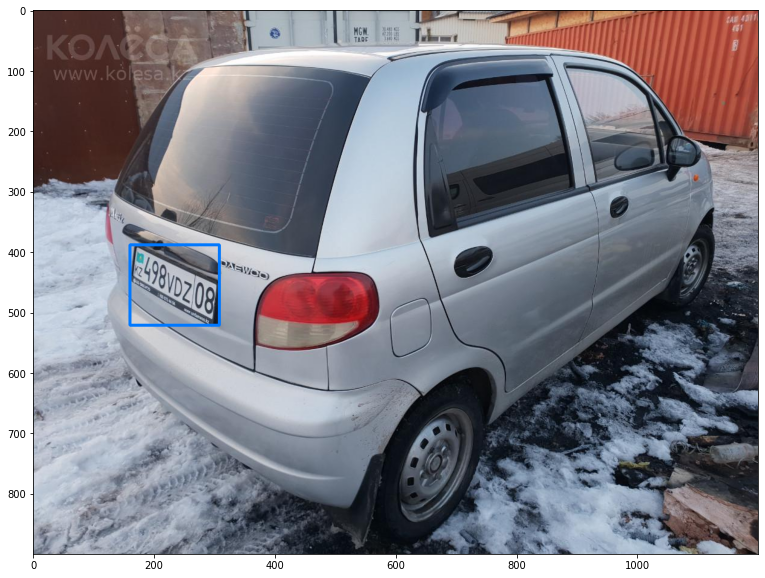

[[[875.0542491316626, 568.785930466232], [875.0542491316625, 511.083522446599], [1081.9457529956658, 465.5673955767052], [1081.9457508683377, 523.2697993643424]]]


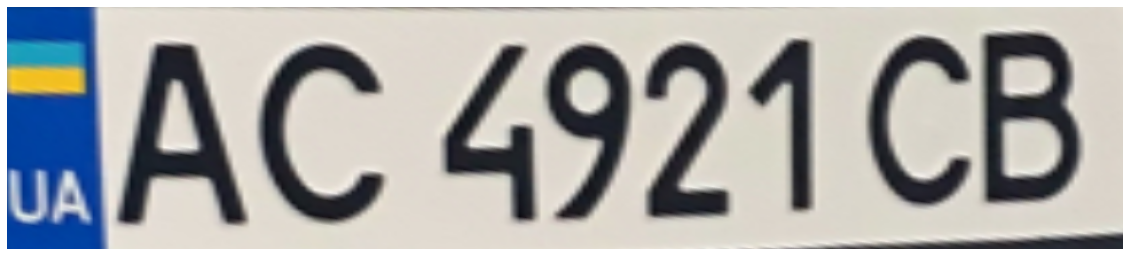

['eu_ua_2015']
[1]
['AC4921CB']


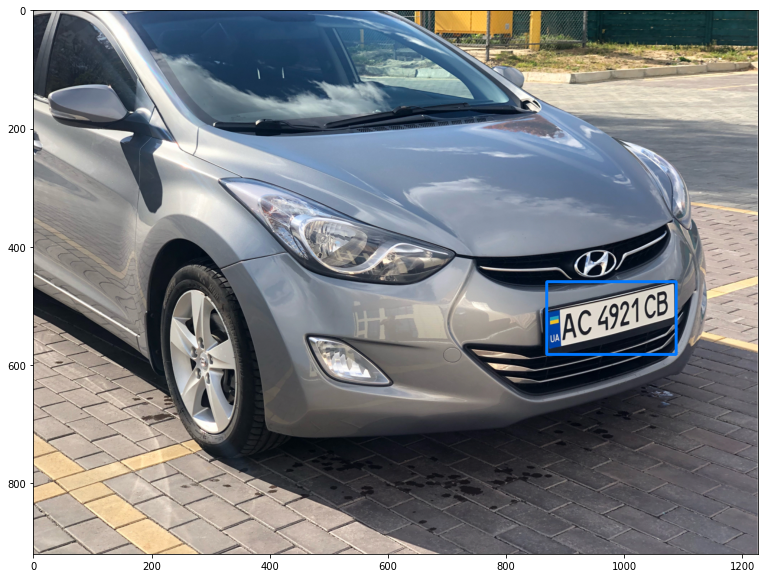

[[[1698.6307371132839, 1050.8335122372641], [1698.630737113284, 997.5001789316684], [1790.0433004162583, 922.2192415056224], [1790.043300841066, 975.552572840691]]]


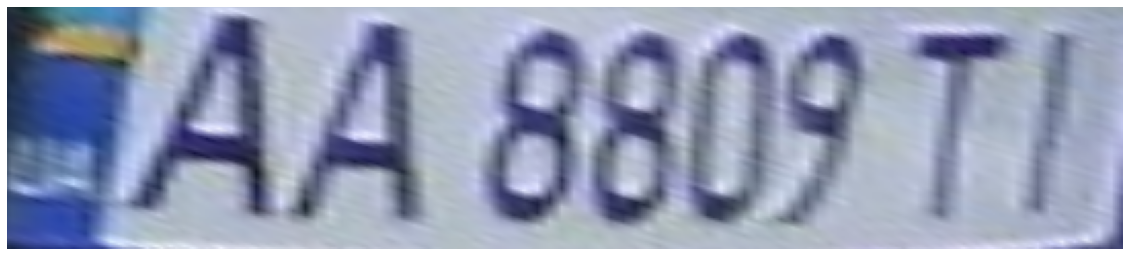

['eu_ua_2015']
[1]
['AA8809TI']


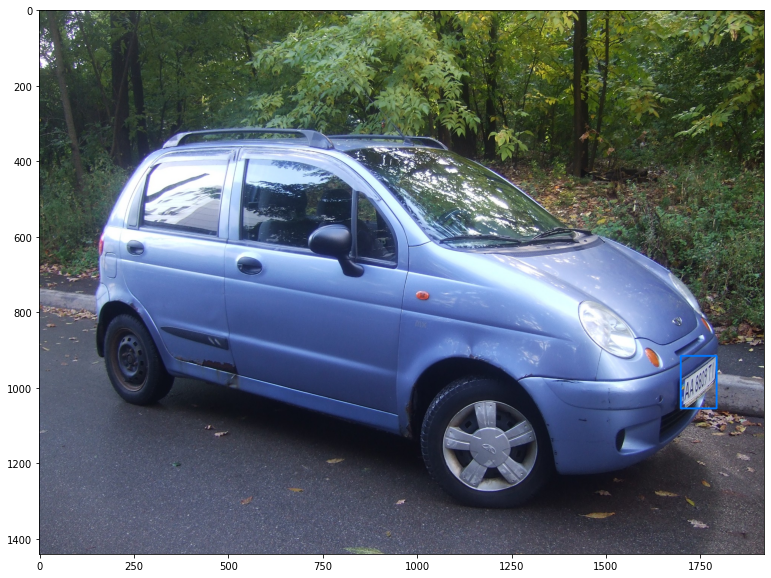

[[[1727.993490310257, 1803.0486349496566], [1711.9756442479909, 1637.425023572563], [2580.982172840594, 1553.3813711935259], [2597.0, 1719.0049827571315]]]


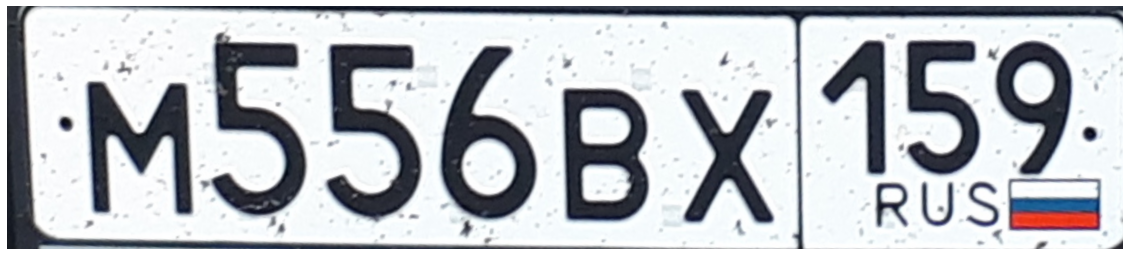

['ru']
[1]
['M556BX159']


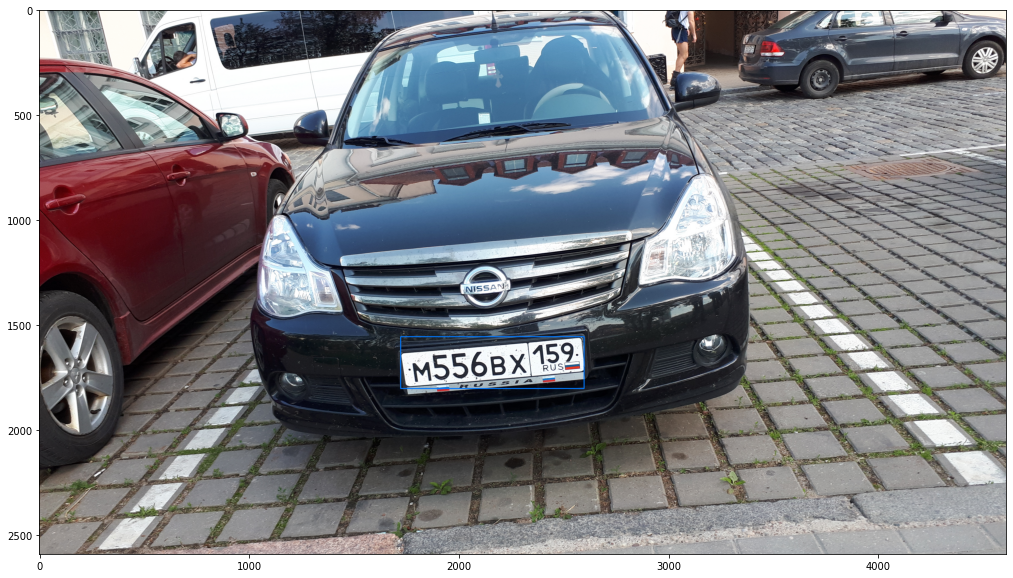

In [7]:
rootDir = 'images/*'

imgs = [mpimg.imread(img_path) for img_path in glob.glob(rootDir)]

for img in imgs:
    targetBoxes = detector.detect_bbox(copy.deepcopy(img))
    targetBoxes = targetBoxes

    all_points = npPointsCraft.detect(img, targetBoxes)
    all_points = [ps for ps in all_points if len(ps)]
    print(all_points)

     # cut zones
    toShowZones = [getCvZoneRGB(img, reshapePoints(rect, 1)) for rect in all_points]
    zones = convertCvZonesRGBtoBGR(toShowZones)
    for zone, points in zip(toShowZones, all_points):
        plt.axis("off")
        plt.imshow(zone)
        plt.show()

    # find standart
    regionIds, countLines = optionsDetector.predict(zones)
    regionNames = optionsDetector.getRegionLabels(regionIds)
    print(regionNames)
    print(countLines)

    # find text with postprocessing by standart  
    textArr = textDetector.predict(zones, regionNames, countLines)
    print(textArr)
    
    # draw rect and 4 points
    for targetBox, points in zip(targetBoxes, all_points):
        cv2.rectangle(img, 
                      (int(targetBox[0]), int(targetBox[1])), 
                      (int(targetBox[2]), int(targetBox[3])), 
                      (0,120,255), 
                      3)
    plt.imshow(img)
    plt.show()